In [2]:
!pip install gensim nltk
!pip install gensim nltk matplotlib

In [ ]:
import pandas as pd

df = pd.read_csv("dataset.csv")

documents = df["response"].astype(str).tolist()
preview_length = 200  
example = documents[0][:preview_length]

print("Total documents:", len(documents))
print("Example preview:", example)



Total documents: 250
Example preview: Quick guide — Download, install and open the app (cross‑platform)

Summary  
Simple, platform‑specific steps to get the app up and running: choose the correct download, install the package, then open 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acts                      250 non-null    object 
 1   prompt                    250 non-null    object 
 2   response                  250 non-null    object 
 3   Word count                250 non-null    int64  
 4   Grammar                   248 non-null    float64
 5   Fluency                   248 non-null    float64
 6   Clarity                   248 non-null    float64
 7   Engagement                248 non-null    float64
 8   Overall Score             248 non-null    float64
 9   AI Similarity             247 non-null    object 
 10  Sources Found             248 non-null    float64
 11  Overall Plagiarism Score  248 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 23.6+ KB


In [5]:
filtered_df = df[df['acts'] == 'Film Critic']
#print(filtered_df)

f_documents = filtered_df["response"].astype(str).tolist()
preview_length = 200  
example = f_documents[0][:preview_length]

print("Total documents:", len(f_documents))
print("Example preview:", example)


Total documents: 5
Example preview: The Matrix (1999) — concise critical review

Summary  
A high‑concept sci‑fi/action film by the Wachowskis in which hacker Thomas Anderson ("Neo") discovers that perceived reality is a simulated const


In [6]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Optional: punctuation set
punct = set(string.punctuation)

def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if len(t) > 1]
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

# Apply preprocessing to all docs
processed_docs = [preprocess(doc) for doc in f_documents]
processed_docs[:3]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[['matrix',
  'concise',
  'critical',
  'review',
  'summary',
  'film',
  'wachowskis',
  'hacker',
  'thomas',
  'anderson',
  'neo',
  'discovers',
  'perceived',
  'reality',
  'simulated',
  'construct',
  'film',
  'mix',
  'cyberpunk',
  'philosophy',
  'kinetic',
  'action',
  'visuals',
  'positive',
  'concept',
  'theme',
  'striking',
  'premise',
  'engages',
  'question',
  'reality',
  'identity',
  'free',
  'remaining',
  'accessible',
  'direction',
  'pacing',
  'bold',
  'assured',
  'direction',
  'balance',
  'exposition',
  'escalating',
  'set',
  'piece',
  'visuals',
  'cinematography',
  'iconic',
  'imagery',
  'matrix',
  'washed',
  'real',
  'world',
  'innovative',
  'camera',
  'work',
  'bullet',
  'time',
  'effect',
  'action',
  'choreography',
  'stylized',
  'martial',
  'art',
  'wirework',
  'integrated',
  'effect',
  'fight',
  'sequence',
  'remain',
  'influential',
  'sound',
  'score',
  'davis',
  'orchestral',
  'score',
  'plus',
  'el

In [7]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print(dictionary.token2id)
print(corpus)


{'accessible': 0, 'action': 1, 'agent': 2, 'anderson': 3, 'antagonist': 4, 'arc': 5, 'art': 6, 'assured': 7, 'atmosphere': 8, 'balance': 9, 'blockbuster': 10, 'bold': 11, 'bullet': 12, 'camera': 13, 'cast': 14, 'cgi': 15, 'character': 16, 'choreography': 17, 'cinema': 18, 'cinematography': 19, 'combination': 20, 'compared': 21, 'compelling': 22, 'compensates': 23, 'concept': 24, 'concise': 25, 'construct': 26, 'create': 27, 'critical': 28, 'cyberpunk': 29, 'dated': 30, 'davis': 31, 'deeper': 32, 'depth': 33, 'development': 34, 'dialogue': 35, 'didactic': 36, 'direction': 37, 'discovers': 38, 'early': 39, 'effect': 40, 'electronic': 41, 'engages': 42, 'era': 43, 'escalating': 44, 'examined': 45, 'exploration': 46, 'exposition': 47, 'feel': 48, 'fight': 49, 'film': 50, 'filmmaking': 51, 'fishburne': 52, 'free': 53, 'fully': 54, 'genre': 55, 'grounded': 56, 'hacker': 57, 'heavy': 58, 'hero': 59, 'highly': 60, 'hugo': 61, 'hybrid': 62, 'iconic': 63, 'idea': 64, 'identity': 65, 'imagery': 6

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


dictionary = corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# --- grid search บน num_topics ---
topic_range = range(2, 10, 1)  # ลองตั้งแต่ 5 ถึง 30 topics  
coherence_values = []
models = []

for k in topic_range:
    model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=k,
                     random_state=42,
                     passes=25,     # ปรับเพิ่มถ้าต้องการความนิ่ง
                     alpha='auto',  # ช่วยปรับ distribution
                     per_word_topics=False)
    models.append(model)
    cm = CoherenceModel(model=model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_values.append(coherence)
    print(f"num_topics={k} -> coherence={coherence:.4f}")


num_topics=2 -> coherence=0.3962
num_topics=3 -> coherence=0.4972
num_topics=4 -> coherence=0.5473
num_topics=5 -> coherence=0.4354
num_topics=6 -> coherence=0.4960
num_topics=7 -> coherence=0.5254
num_topics=8 -> coherence=0.4410
num_topics=9 -> coherence=0.3878


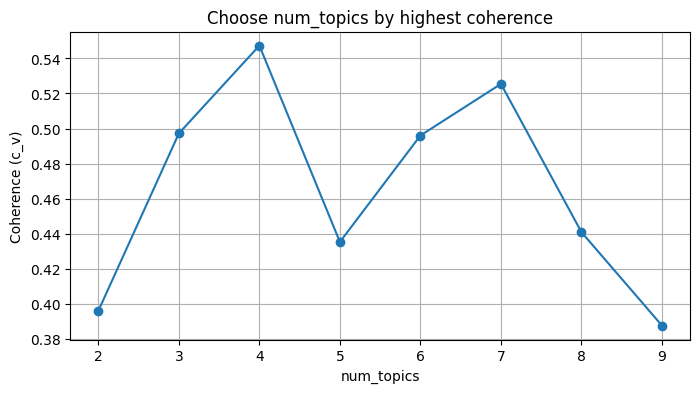

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,4))
plt.plot(topic_range, coherence_values, marker='o')
plt.xlabel("num_topics")
plt.ylabel("Coherence (c_v)")
plt.title("Choose num_topics by highest coherence")
plt.grid(True)

plt.xticks(np.arange(min(topic_range), max(topic_range)+1, 1))  # step = 1
plt.show()

In [12]:
# --- เลือก model ที่ coherence สูงสุด ---
best_idx = coherence_values.index(max(coherence_values))
best_k = topic_range[best_idx]
best_model = models[best_idx]
print("Best num_topics =", best_k, "with coherence =", coherence_values[best_idx])

# แสดง topic ของ best model
for i, t in best_model.show_topics(num_topics=best_k, num_words=8, formatted=False):
    words = [w for w,prob in t]
    print(f"Topic {i}: {', '.join(words)}")
    print("-------------------------------------------")

Best num_topics = 4 with coherence = 0.5472706896066182
Topic 0: smith, lead, highly, blockbuster, orchestral, grounded, accessible, integrated
-------------------------------------------
Topic 1: interrogated, stylistically, photographic, pope, contrasting, occasionally, bill, reducing
-------------------------------------------
Topic 2: moment, lack, authority, menace, payoff, distinct, innovative, uneven
-------------------------------------------
Topic 3: large, tension, staging, lasting, blunt, escalation, narratively, blend
-------------------------------------------


ดู distribution ของแต่ละเอกสาร

In [24]:
# --- หา topic distribution ของแต่ละ document ---
doc_topics = []
for doc in corpus:
    topic_dist = best_model.get_document_topics(doc, minimum_probability=0)
    topic_dict = dict(topic_dist)
    probs = [topic_dict[i] for i in range(best_k)]
    doc_topics.append(probs)

import pandas as pd

df_topic_dist = pd.DataFrame(doc_topics,
                             columns=[f"Topic_{i}" for i in range(best_k)])

print(df_topic_dist)

    Topic_0   Topic_1   Topic_2   Topic_3
0  0.571057  0.001663  0.426525  0.000755
1  0.994897  0.001199  0.003360  0.000544
2  0.003252  0.001820  0.994102  0.000826
3  0.002446  0.001369  0.995564  0.000621
4  0.002536  0.992843  0.003977  0.000644


In [20]:
!pip install pyLDAvis

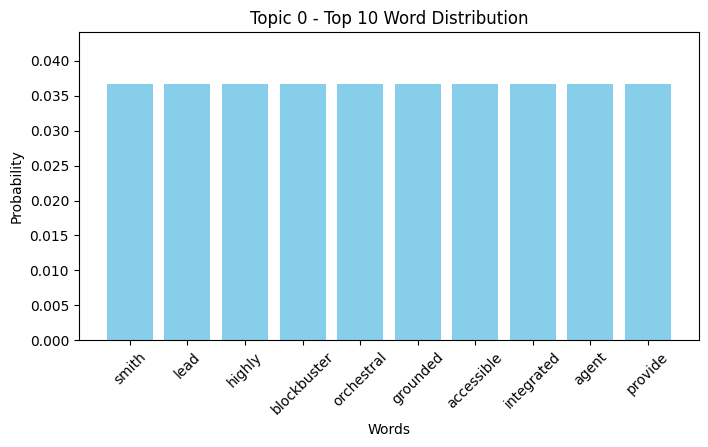

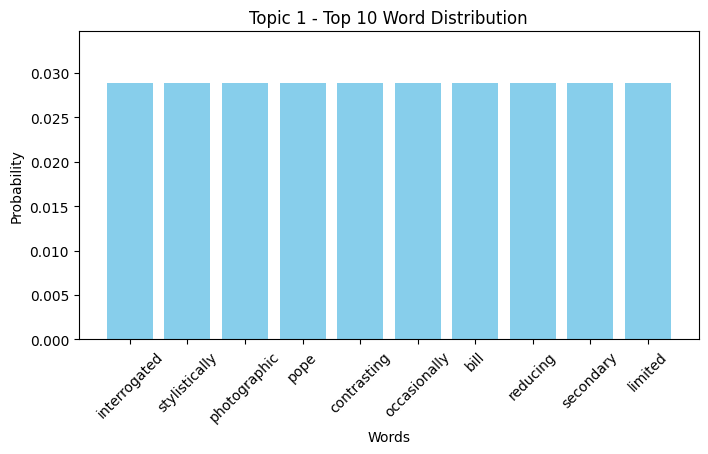

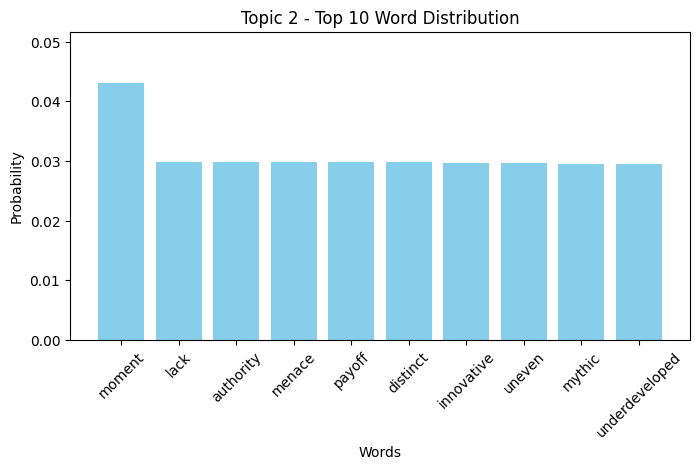

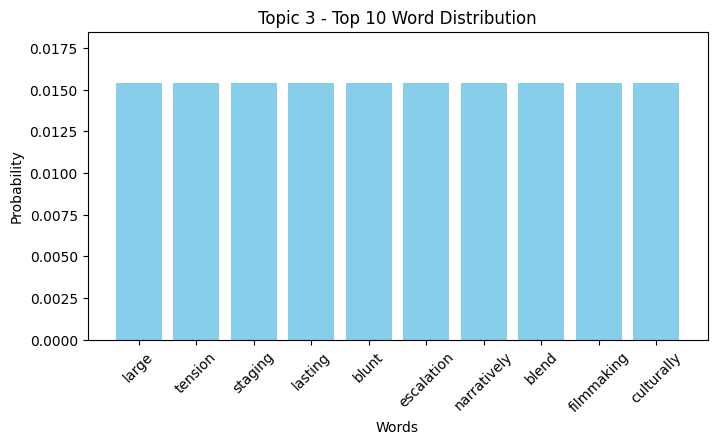

In [21]:
import matplotlib.pyplot as plt

# กำหนดจำนวนคำที่จะแสดงในกราฟ
num_words = 10

for i, t in best_model.show_topics(num_topics=best_k, num_words=num_words, formatted=False):
    words, probs = zip(*t)  # แยกคำกับ probability
    plt.figure(figsize=(8,4))
    plt.bar(words, probs, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Probability')
    plt.title(f'Topic {i} - Top 10 Word Distribution')
    plt.xticks(rotation=45)
    plt.ylim(0, max(probs)*1.2)
    plt.show()


In [26]:
lda_model = LdaModel(corpus = corpus, num_topics = best_k, id2word=dictionary, passes=10, random_state=42)
lda_model.print_topics()

[(0,
  '0.037*"smith" + 0.037*"lead" + 0.037*"highly" + 0.037*"blockbuster" + 0.037*"orchestral" + 0.037*"grounded" + 0.037*"accessible" + 0.037*"integrated" + 0.037*"agent" + 0.037*"provide"'),
 (1,
  '0.029*"plus" + 0.029*"simulated" + 0.029*"remain" + 0.029*"limited" + 0.029*"lasting" + 0.029*"blunt" + 0.029*"escalation" + 0.029*"narratively" + 0.029*"blend" + 0.029*"culturally"'),
 (2,
  '0.043*"moment" + 0.029*"lack" + 0.029*"authority" + 0.029*"menace" + 0.029*"payoff" + 0.029*"distinct" + 0.029*"innovative" + 0.029*"mythic" + 0.029*"camera" + 0.029*"uneven"'),
 (3,
  '0.016*"large" + 0.016*"tension" + 0.016*"staging" + 0.016*"lasting" + 0.016*"blunt" + 0.016*"escalation" + 0.016*"narratively" + 0.016*"blend" + 0.016*"culturally" + 0.016*"archetypal"')]

In [23]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.034263 -0.019929       1        1  65.051201
3      0.009073  0.019658       2        1  17.748024
2     -0.048338 -0.009432       3        1  16.254957
1      0.005002  0.009703       4        1   0.945819, topic_info=            Term      Freq     Total Category  logprob  loglift
36          pope  2.000000  2.000000  Default  30.0000  30.0000
12       limited  1.000000  1.000000  Default  29.0000  29.0000
19     simulated  1.000000  1.000000  Default  28.0000  28.0000
26   contrasting  2.000000  2.000000  Default  27.0000  27.0000
62      seamless  2.000000  2.000000  Default  26.0000  26.0000
..           ...       ...       ...      ...      ...      ...
64  subordinated  0.021763  2.133939   Topic4  -4.0419   0.0754
60   integration  0.021931  2.182425   Topic4  -4.0342   0.0606
40     secondary  0.021715  2.225254   Topic4  -4.0441   0.0312
34  occasionally  0.021732  2.252935   Topic4  -4.0433   0.0197
35  photographic  0.020982  2.223794   Topic4  -4.0784  -0.0024

[160 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         1  0.522210      accessible
0         2  0.522210      accessible
58        1  0.492320          agency
1         1  0.522318           agent
1         2  0.522318           agent
...     ...       ...             ...
43        1  0.476085   stylistically
64        1  0.937234    subordinated
44        1  0.472165         tension
21        3  0.669308  underdeveloped
22        3  0.680706          uneven

[84 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])